In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook as tqdm
import sys
sys.path.append("../src/")
from logger import setup_logger, LOGGER
from trainer import train_lgbm
from util_tool import reduce_mem_usage
from sklearn.decomposition import TruncatedSVD
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [47]:
# ==================
# Constant
# ==================
TRAIN_PATH = "../input/train.csv"
TEST_PATH = "../input/test.csv"
USER_PATH = "../input/user_x_anime.csv"

In [48]:
# =====================
# Settings
# =====================
SAVE_PATH = "../output/fe/fe018.feather"

In [49]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
fe017 = pd.read_feather("../output/fe/fe017.feather")

In [50]:
fe017["air_year"] = fe017["air_year"].fillna(0)
fe017["air_year"] = fe017["air_year"].astype(str)

In [51]:
train["air_year"] = fe017["air_year"].iloc[:len(train)].values
test["air_year"] = fe017["air_year"].iloc[len(train):].values

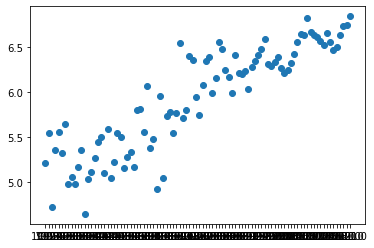

In [52]:
plt.scatter(train.groupby(by="air_year")["Score"].mean().index,train.groupby(by="air_year")["Score"].mean())

In [53]:
from sklearn.model_selection import StratifiedKFold, KFold,GroupKFold
SEED = 0
N_SPLITS = 5
SHUFFLE = True
kf = KFold(n_splits=N_SPLITS,random_state = SEED,shuffle=SHUFFLE)
cat_cols = ["air_year"]
target = "Score"
for c in cat_cols:
    print(c)
    train[f"{c}_target_encoding"] = np.nan
    test[f"{c}_target_encoding"] = np.nan
    for fold, (train_idx, valid_idx) in enumerate(kf.split(train,train[target])):
        x_train_dict = train.iloc[train_idx][[target,c]].groupby(by=c)[target].mean().to_dict()
        train.loc[valid_idx,f"{c}_target_encoding"] = train.loc[valid_idx,c].map(x_train_dict)
    train_dict = train[[target,c]].groupby(by=c)[target].mean().to_dict()
    test[f"{c}_target_encoding"] = test[c].map(train_dict)

air_year


In [54]:
train = pd.concat([train[["air_year_target_encoding"]],test[["air_year_target_encoding"]]]).reset_index(drop=True)

In [55]:
train = reduce_mem_usage(train)
train.to_feather(SAVE_PATH)

Memory usage of dataframe is 0.09 MB
column =  1
0
Memory usage after optimization is: 0.05 MB
Decreased by 49.9%
